# Author: Jose Guzman


In [88]:
# Install the packages listed in requirements.txt
%pip install -r requirements.txt

# Data Importing

In [89]:
import pandas as pd

df = pd.read_csv('data/atp_tennis.csv')
print(df.head())


                           Tournament        Date         Series    Court  \
0  Australian Hardcourt Championships  2000-01-03  International  Outdoor   
1  Australian Hardcourt Championships  2000-01-03  International  Outdoor   
2  Australian Hardcourt Championships  2000-01-03  International  Outdoor   
3  Australian Hardcourt Championships  2000-01-03  International  Outdoor   
4  Australian Hardcourt Championships  2000-01-03  International  Outdoor   

  Surface      Round  Best of        Player_1       Player_2       Winner  \
0    Hard  1st Round        3      Dosedel S.    Ljubicic I.   Dosedel S.   
1    Hard  1st Round        3      Clement A.     Enqvist T.   Enqvist T.   
2    Hard  1st Round        3       Escude N.  Baccanello P.    Escude N.   
3    Hard  1st Round        3  Knippschild J.     Federer R.   Federer R.   
4    Hard  1st Round        3     Fromberg R.  Woodbridge T.  Fromberg R.   

   Rank_1  Rank_2  Pts_1  Pts_2  Odd_1  Odd_2        Score  
0      63    

In [90]:
# Display summary statistics of the dataset
df.describe(include='all')

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
count,63079,63079,63079,63079,63079,63079,63079.000000,63079,63079,63079,63079.000000,63079.000000,63079.00000,63079.000000,63079.000000,63079.000000,63079
unique,263,6096,8,2,4,8,NaN,1449,1446,1118,NaN,NaN,NaN,NaN,NaN,NaN,6844
top,French Open,2001-01-15,ATP250,Outdoor,Hard,1st Round,NaN,Federer R.,Federer R.,Federer R.,NaN,NaN,NaN,NaN,NaN,NaN,6-3 6-4
freq,3052,125,16473,51821,33918,28937,NaN,668,725,1151,NaN,NaN,NaN,NaN,NaN,NaN,1146
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.376322,NaN,NaN,NaN,75.874380,75.545792,1104.95699,1111.239636,2.174835,2.165586,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.781687,NaN,NaN,NaN,100.463901,101.198603,1709.53914,1736.369386,2.788854,2.747397,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,24.000000,24.000000,16.50000,18.500000,1.220000,1.220000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,53.000000,54.000000,680.00000,681.000000,1.660000,1.660000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,92.000000,92.000000,1215.00000,1220.000000,2.625000,2.620000,NaN


Define Function to Handle Missing Values 

In [91]:
def handle_missing_values(df):
    # Drop columns with more than 50% missing values
    df = df.dropna(thresh=len(df) * 0.5, axis=1)
    # Forward fill remaining missing values
    df = df.ffill()
    return df



String Manipulation

In [92]:
def split_player_name(df, player_column):
    names = df[player_column].str.split(' ', n=1, expand=True)
    last_name_col = f"{player_column}_Last_Name"
    first_initial_col = f"{player_column}_First_Initial"
    df[last_name_col] = names[0]
    df[first_initial_col] = names[1].str[0]
    df.drop(columns=[player_column], inplace=True)
    return df



Read the CSV File

In [93]:
def split_player_name(df, player_column):
    names = df[player_column].str.split(' ', n=1, expand=True)
    last_name_col = f"{player_column}_Last_Name"
    first_initial_col = f"{player_column}_First_Initial"
    df[last_name_col] = names[0]
    df[first_initial_col] = names[1].str[0]
    df.drop(columns=[player_column], inplace=True)
    return df


Handling Missing Values

In [94]:
df = handle_missing_values(df)


Split Player Names

In [95]:
if 'Player_1' in df.columns and 'Player_2' in df.columns:
    df = split_player_name(df, 'Player_1')
    df = split_player_name(df, 'Player_2')
else:
    print("Required columns 'Player_1' and 'Player_2' are not present in the DataFrame.")


Convert Data Column to Datatime

In [96]:
if 'Date' in df.columns:
    try:
        df['Date'] = pd.to_datetime(df['Date'])
    except Exception as e:
        print(f"Error converting 'Date' column: {e}")



Save Modified DataFrame to new CSV File

In [97]:
output_file = 'data/atp_tennis_modified.csv'
df.to_csv(output_file, index=False)

print("ATP Tennis file has been processed and saved successfully.")



ATP Tennis file has been processed and saved successfully.


Review Dataframe 

In [98]:
df.head()


,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Player_1_Last_Name,Player_1_First_Initial,Player_2_Last_Name,Player_2_First_Initial
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2,Dosedel,S,Ljubicic,I
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6,Clement,A,Enqvist,T
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3,Escude,N,Baccanello,P
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6,Knippschild,J,Federer,R
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,81,198,-1,-1,-1.0,-1.0,7-6 5-7 6-4,Fromberg,R,Woodbridge,T


In [99]:
# Function to parse scores
def parse_scores(score_str, num_sets):
    try:
        # Split the score string by spaces to get individual sets
        sets = score_str.split(' ')
        player_1_scores = [None] * num_sets
        player_2_scores = [None] * num_sets
        
        for i, set_score in enumerate(sets):
            p1_score, p2_score = map(int, set_score.split('-'))
            player_1_scores[i] = p1_score
            player_2_scores[i] = p2_score
        
        return player_1_scores, player_2_scores
    except Exception as e:
        # Handle any unexpected format issues
        return [None] * num_sets, [None] * num_sets

In [100]:
# Function to calculate sets won
def calculate_sets_won(df, player):
    sets_won = []
    for index, row in df.iterrows():
        player_sets_won = 0
        for i in range(1, row['Best of'] + 1):
            if row[f'Player_{player}_Set_{i}'] is not None and row[f'Player_{player}_Set_{i}'] > row[f'Player_{3-player}_Set_{i}']:
                player_sets_won += 1
        sets_won.append(player_sets_won)
    return sets_won


Let's find a Tennis Player's Match History 

In [101]:
# Function to parse the score string and extract individual set scores
def parse_scores(score_str, num_sets):
    try:
        sets = score_str.split(' ')
        player_1_scores = [None] * num_sets
        player_2_scores = [None] * num_sets
        
        for i, set_score in enumerate(sets):
            p1_score, p2_score = map(int, set_score.split('-'))
            player_1_scores[i] = p1_score
            player_2_scores[i] = p2_score
        
        return player_1_scores, player_2_scores
    except Exception as e:
        return [None] * num_sets, [None] * num_sets

# Function to calculate sets won
def calculate_sets_won(df, player):
    sets_won = []
    for index, row in df.iterrows():
        player_sets_won = 0
        for i in range(1, row['Best of'] + 1):
            if row[f'Player_{player}_Set_{i}'] is not None and row[f'Player_{player}_Set_{i}'] > row[f'Player_{3-player}_Set_{i}']:
                player_sets_won += 1
        sets_won.append(player_sets_won)
    return sets_won

# Function to filter matches based on user input and create an output CSV
def filter_and_create_csv(player_last_name, player_first_initial, start_year, end_year, best_of_games):
    # Load the dataset
    file_path = 'data/atp_tennis_modified.csv'  # Update with the correct file path
    df = pd.read_csv(file_path)
    
    # Debugging: Print column names in the initial DataFrame
    print(f"Initial DataFrame columns: {df.columns.tolist()}")
    
    # Filter the dataset based on the year range
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[(df['Date'].dt.year >= start_year) & (df['Date'].dt.year <= end_year)]
    
    # Debugging: Print the filtered DataFrame based on year range
    print(f"Matches found for year range {start_year}-{end_year}: {len(df)}")
    print(f"Columns after year filter: {df.columns.tolist()}")
    
    # Filter the dataset based on the number of best-of games
    df = df[df['Best of'] == best_of_games]
    
    # Debugging: Print the filtered DataFrame based on best-of games
    print(f"Matches found for best-of {best_of_games}: {len(df)}")
    print(f"Columns after best-of filter: {df.columns.tolist()}")
    
    if df.empty:
        print("No matches found for the given year range and best-of games.")
        return None
    
    # Enhanced filtering logic for player name
    df_player = df[((df['Player_1_Last_Name'].str.strip().str.lower() == player_last_name.lower()) & (df['Player_1_First_Initial'].str.strip().str.lower() == player_first_initial.lower())) | 
                   ((df['Player_2_Last_Name'].str.strip().str.lower() == player_last_name.lower()) & (df['Player_2_First_Initial'].str.strip().str.lower() == player_first_initial.lower()))]
    
    # Debugging: Print the filtered DataFrame based on player name
    print(f"Matches found for player {player_last_name} {player_first_initial}: {len(df_player)}")
    print(f"Columns after player name filter: {df_player.columns.tolist()}")
    
    if df_player.empty:
        print("No matches found for the specified player.")
        return None
    
    # Determine match outcomes for the specified player
    df_player.loc[:, 'Outcome'] = df_player.apply(
        lambda row: 'Win' if (row['Winner'].strip().lower() == f'{player_last_name.lower()} {player_first_initial.lower()}.') else 'Loss', axis=1)

    # Split and parse scores
    df_player.loc[:, 'Best of'] = df_player['Best of'].astype(int)
    max_sets = df_player['Best of'].max()
    for i in range(1, max_sets + 1):
        df_player.loc[:, f'Player_1_Set_{i}'] = None
        df_player.loc[:, f'Player_2_Set_{i}'] = None
    parsed_scores = df_player.apply(lambda row: parse_scores(row['Score'], row['Best of']), axis=1)
    for i in range(max_sets):
        df_player.loc[:, f'Player_1_Set_{i+1}'] = parsed_scores.apply(lambda x: x[0][i] if len(x[0]) > i else None)
        df_player.loc[:, f'Player_2_Set_{i+1}'] = parsed_scores.apply(lambda x: x[1][i] if len(x[1]) > i else None)
    df_player = df_player.dropna(subset=[f'Player_1_Set_{i+1}' for i in range(max_sets)])
    
    # Keep only the relevant columns for the specified player
    player_sets_columns = [f'Player_1_Set_{i+1}' if (df_player.iloc[0]['Player_1_Last_Name'].strip().lower() == player_last_name.lower() and df_player.iloc[0]['Player_1_First_Initial'].strip().lower() == player_first_initial.lower()) else f'Player_2_Set_{i+1}' for i in range(max_sets)]
    player_sets_columns = [col for col in player_sets_columns if col in df_player.columns]
    
    # Create an output CSV specific to the player
    output_columns = ['Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of', 'Outcome'] + player_sets_columns
    df_player_filtered = df_player[output_columns]
    
    output_file = f'data/{player_last_name}_{player_first_initial}_matches_{start_year}_{end_year}_best_of_{best_of_games}.csv'
    df_player_filtered.to_csv(output_file, index=False)
    print(f'Output CSV created: {output_file}')
    return df_player_filtered

# Function to get user inputs and validate them
def get_valid_input():
    while True:
        player_last_name = input("Enter player's last name: ")
        player_first_initial = input("Enter player's first initial: ")
        try:
            start_year = int(input("Enter start year: "))
            end_year = int(input("Enter end year: "))
            best_of_games = int(input("Enter number of best-of games: "))
        except ValueError:
            print("Invalid input. Please enter valid numeric values for years and best-of games.")
            continue
        
        df_player = filter_and_create_csv(player_last_name, player_first_initial, start_year, end_year, best_of_games)
        if df_player is not None:
            return df_player

# Get user inputs and filter matches
df_player = get_valid_input()

# Display the first few rows of the filtered dataset
if df_player is not None:
    display(df_player.head())

Initial DataFrame columns: ['Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of', 'Winner', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 'Score', 'Player_1_Last_Name', 'Player_1_First_Initial', 'Player_2_Last_Name', 'Player_2_First_Initial']
Matches found for year range 2020-2023: 8785
Columns after year filter: ['Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of', 'Winner', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 'Score', 'Player_1_Last_Name', 'Player_1_First_Initial', 'Player_2_Last_Name', 'Player_2_First_Initial']
Matches found for best-of 3: 6944
Columns after best-of filter: ['Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round', 'Best of', 'Winner', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 'Score', 'Player_1_Last_Name', 'Player_1_First_Initial', 'Player_2_Last_Name', 'Player_2_First_Initial']
Matches found for player Alcaraz C: 137
Columns after player name filter: ['Tournament', 'Date', 'Series'

/var/folders/jn/mg3jxbw96_v18x44tq5dfhv00000gn/T/ipykernel_64178/915758239.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player.loc[:, 'Outcome'] = df_player.apply(
/var/folders/jn/mg3jxbw96_v18x44tq5dfhv00000gn/T/ipykernel_64178/915758239.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player.loc[:, f'Player_1_Set_{i}'] = None
/var/folders/jn/mg3jxbw96_v18x44tq5dfhv00000gn/T/ipykernel_64178/915758239.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,Tournament,Date,Series,Court,Surface,Round,Best of,Outcome,Player_1_Set_1,Player_1_Set_2,Player_1_Set_3
53200,Rio Open,2020-02-18,ATP500,Outdoor,Clay,1st Round,3,Win,7,4,7.0
53213,Rio Open,2020-02-20,ATP500,Outdoor,Clay,2nd Round,3,Loss,4,6,4.0
54586,Miami Open,2021-03-25,Masters 1000,Outdoor,Hard,1st Round,3,Loss,6,2,7.0
54710,AnyTech365 Andalucia Open,2021-04-08,ATP250,Outdoor,Hard,2nd Round,3,Win,4,6,6.0
54851,Millennium Estoril Open,2021-04-27,ATP250,Outdoor,Clay,1st Round,3,Loss,3,6,4.0


In [102]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


Tournament                0
Date                      0
Series                    0
Court                     0
Surface                   0
Round                     0
Best of                   0
Winner                    0
Rank_1                    0
Rank_2                    0
Pts_1                     0
Pts_2                     0
Odd_1                     0
Odd_2                     0
Score                     0
Player_1_Last_Name        0
Player_1_First_Initial    0
Player_2_Last_Name        0
Player_2_First_Initial    0
dtype: int64


## EDA

Import Libariries 

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load the Dataset

In [140]:
# Inspect the dataset to understand its structure
df.info()

# Display summary statistics
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tournament      48 non-null     object        
 1   Date            48 non-null     datetime64[ns]
 2   Series          48 non-null     object        
 3   Court           48 non-null     object        
 4   Surface         48 non-null     object        
 5   Round           48 non-null     object        
 6   Best of         48 non-null     int64         
 7   Outcome         48 non-null     int64         
 8   Player_1_Set_1  48 non-null     int64         
 9   Player_1_Set_2  48 non-null     int64         
 10  Player_1_Set_3  48 non-null     float64       
 11  Year            48 non-null     int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), object(5)
memory usage: 4.4+ KB


,Date,Best of,Outcome,Player_1_Set_1,Player_1_Set_2,Player_1_Set_3,Year
count,48,48.0,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2022-06-29 22:30:00,3.0,0.645833,5.395833,5.104167,5.270833,2022.041667
min,2020-02-18 00:00:00,3.0,0.000000,1.000000,1.000000,1.000000,2020.000000
25%,2021-11-01 00:00:00,3.0,0.000000,4.750000,4.000000,4.000000,2021.000000
50%,2022-06-12 12:00:00,3.0,1.000000,6.000000,6.000000,6.000000,2022.000000
75%,2023-04-07 18:00:00,3.0,1.000000,6.000000,6.000000,6.000000,2023.000000
max,2023-11-13 00:00:00,3.0,1.000000,7.000000,7.000000,7.000000,2023.000000
std,NaN,0.0,0.483321,1.633943,1.765383,1.646913,0.874176


In [141]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

In [142]:
# Calculate the average set score per year for each set
average_scores_per_year = df.groupby('Year').agg({
    'Player_1_Set_1': 'mean',
    'Player_1_Set_2': 'mean',
    'Player_1_Set_3': 'mean'
}).reset_index()

In [143]:
# Filter out any non-integer years if they exist (though they shouldn't)
average_scores_per_year = average_scores_per_year[average_scores_per_year['Year'] == average_scores_per_year['Year'].astype(int)]


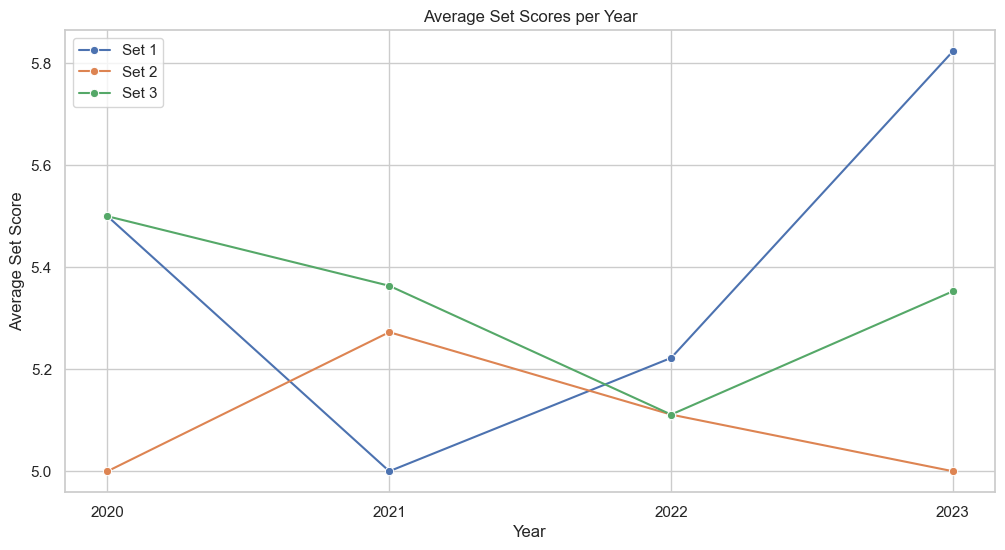

In [144]:
# Load the filtered dataset for the specified player
file_path = 'data/Alcaraz_C_matches_2020_2023_best_of_3.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Calculate the average set score per year for each set
average_scores_per_year = df.groupby('Year').agg({
    'Player_1_Set_1': 'mean',
    'Player_1_Set_2': 'mean',
    'Player_1_Set_3': 'mean'
}).reset_index()

# Plot the average set scores per year
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_scores_per_year, x='Year', y='Player_1_Set_1', marker='o', label='Set 1')
sns.lineplot(data=average_scores_per_year, x='Year', y='Player_1_Set_2', marker='o', label='Set 2')
sns.lineplot(data=average_scores_per_year, x='Year', y='Player_1_Set_3', marker='o', label='Set 3')
plt.title('Average Set Scores per Year')
plt.xlabel('Year')
plt.ylabel('Average Set Score')
plt.xticks(average_scores_per_year['Year'])
plt.legend()
plt.show()

In [146]:
# Check for missing values
print(df.isnull().sum())

Tournament        0
Date              0
Series            0
Court             0
Surface           0
Round             0
Best of           0
Outcome           0
Player_1_Set_1    0
Player_1_Set_2    0
Player_1_Set_3    0
Year              0
dtype: int64


In [147]:
# Analyze win and loss records
win_count = df['Outcome'].value_counts().get('Win', 0)
loss_count = df['Outcome'].value_counts().get('Loss', 0)

print(f"Total Wins: {win_count}")
print(f"Total Losses: {loss_count}")

Total Wins: 31
Total Losses: 17


In [148]:
# Performance over time for each set involving Alcaraz
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

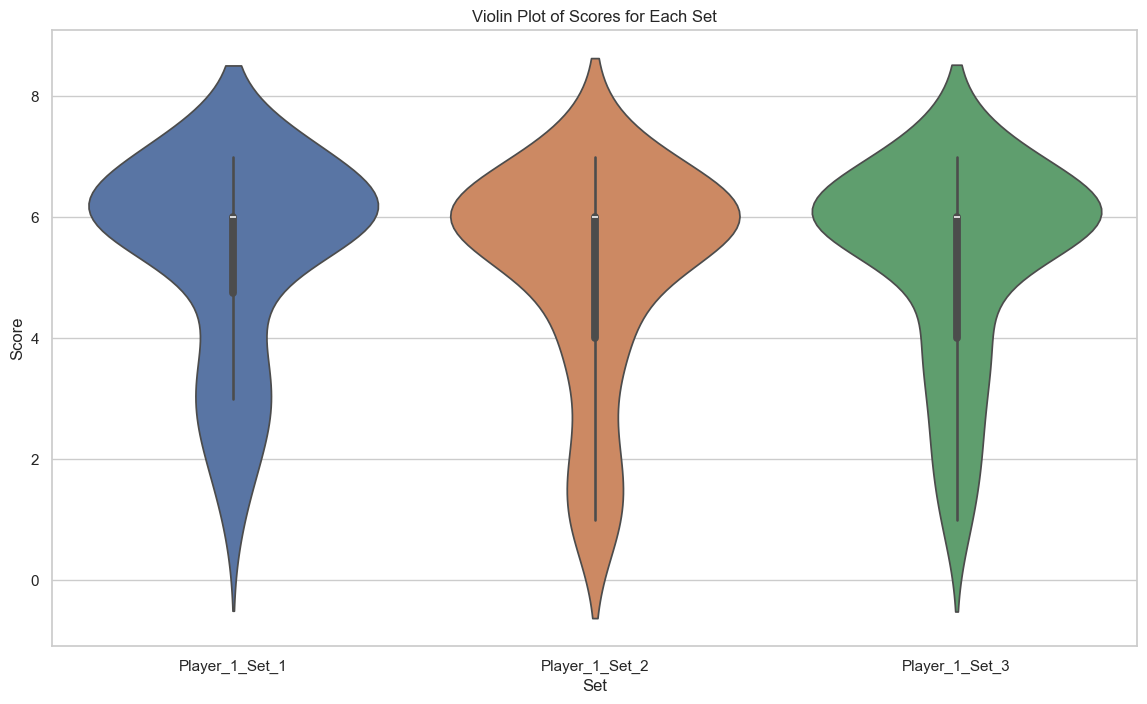

In [149]:
# Violin plots for each set
plt.figure(figsize=(14, 8))
sns.violinplot(data=df[['Player_1_Set_1', 'Player_1_Set_2', 'Player_1_Set_3']])
plt.title('Violin Plot of Scores for Each Set')
plt.xlabel('Set')
plt.ylabel('Score')
plt.show()

In [150]:
# Summary statistics for each set
print("Summary statistics for each set:")
print(df[['Player_1_Set_1', 'Player_1_Set_2', 'Player_1_Set_3']].describe())

Summary statistics for each set:
       Player_1_Set_1  Player_1_Set_2  Player_1_Set_3
count       48.000000       48.000000       48.000000
mean         5.395833        5.104167        5.270833
std          1.633943        1.765383        1.646913
min          1.000000        1.000000        1.000000
25%          4.750000        4.000000        4.000000
50%          6.000000        6.000000        6.000000
75%          6.000000        6.000000        6.000000
max          7.000000        7.000000        7.000000


In [151]:
# Additional analysis: Win and loss distribution by year
df['Year'] = df['Date'].dt.year
win_loss_by_year = df.groupby(['Year', 'Outcome']).size().unstack().fillna(0)

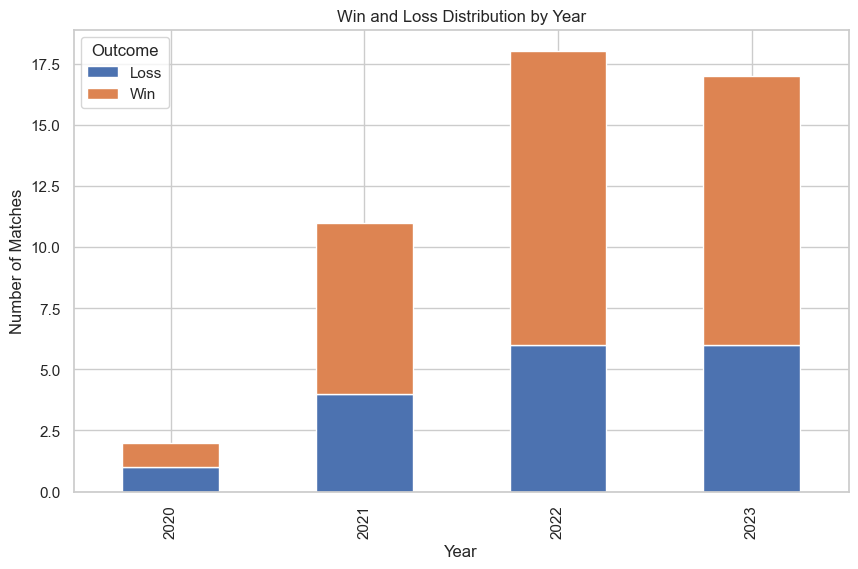

In [152]:
# Plot win and loss distribution by year
win_loss_by_year.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Win and Loss Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.show()

# Predicting Match Outcomes 

Logistic Regression Predicting Match Outcomes 

In [153]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [154]:
# Preprocess the data
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['Year'] = df['Date'].dt.year

In [155]:
# Encode outcome as binary
df['Outcome'] = df['Outcome'].apply(lambda x: 1 if x == 'Win' else 0)

In [156]:
# Feature selection
features = ['Player_1_Set_1', 'Player_1_Set_2', 'Player_1_Set_3']
X = df[features].copy()
y = df['Outcome'].copy()

In [157]:
# Handle missing values (fill with the mean)
X = X.apply(lambda col: col.fillna(col.mean()), axis=0)

In [158]:
# Check class distribution
print("Class distribution in target variable:")
print(y.value_counts())

Class distribution in target variable:
Outcome
1    31
0    17
Name: count, dtype: int64


In [159]:
# Ensure we have at least one match from both classes
if y.nunique() != 2:
    print("The dataset does not contain both classes ('Win' and 'Loss'). Please check the data.")
else:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train a logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Logistic Regression Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    # Train a random forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred_rf = rf_model.predict(X_test)

    # Evaluate the model
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
    class_report_rf = classification_report(y_test, y_pred_rf)

    print(f"Random Forest Accuracy: {accuracy_rf}")
    print("Random Forest Confusion Matrix:")
    print(conf_matrix_rf)
    print("Random Forest Classification Report:")
    print(class_report_rf)

Logistic Regression Accuracy: 0.7333333333333333
Confusion Matrix:
[[ 1  3]
 [ 1 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.77      0.91      0.83        11

    accuracy                           0.73        15
   macro avg       0.63      0.58      0.58        15
weighted avg       0.70      0.73      0.70        15

Random Forest Accuracy: 0.6
Random Forest Confusion Matrix:
[[1 3]
 [3 8]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.73      0.73      0.73        11

    accuracy                           0.60        15
   macro avg       0.49      0.49      0.49        15
weighted avg       0.60      0.60      0.60        15

